# Regression &ndash; challenging example two

In part two of regression's challenging example we considered Boston housing data and three independent variables. Here we continue studying that example by adding a third independent variable. We will notice that coefficient of determination (R squared) is thus improved. This note can be read independently from part one.

In [1]:
## Import necessary libraries.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
### In this example we use data of Boston house prices from the sklearn library.

from sklearn.datasets import load_boston
boston_data = load_boston()

### boston_data includes already named parts

boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
### Description of the Boston housing data.

print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [16]:
### Read the data in a dataframe.

### features

df = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)

### target

df['MEDV'] = boston_data.target

### Take a peek at the data

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
### It is always worth checking how many missing values there are in the data.

df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

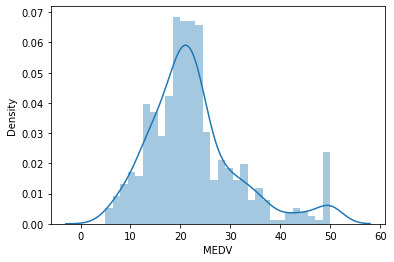

In [6]:
### distribution of the target variable (dependent variable, forecast variable)

sns.distplot(df['MEDV'], bins = 30)

<AxesSubplot:>

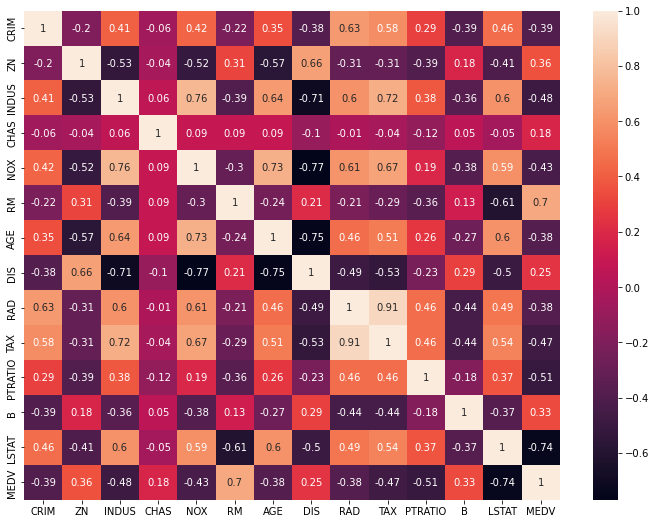

In [7]:
### Correlation coefficients in the precision of two decimals.

correlation_matrix = df.corr().round(2)

### Create a figure where the correlation matrix fits into.

plt.figure(figsize = (12,9))

### Coloring formatting is done by the heatmap function of the seaborn library.

sns.heatmap(data = correlation_matrix, annot = True)

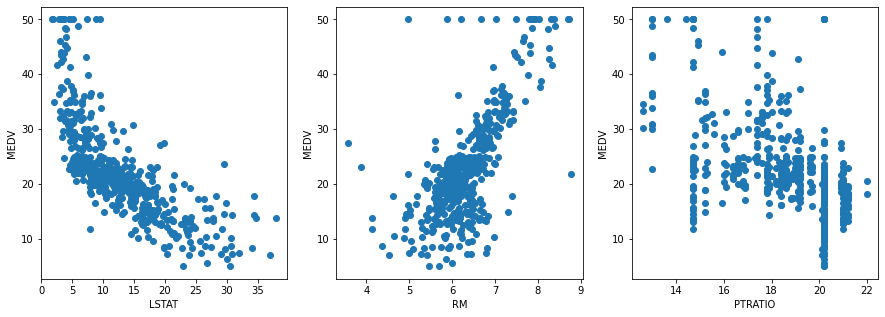

In [8]:
### We now choose three variables LSTAT, RM and PTRATIO with the highest correlation coefficients with the dependent variable MEDV.

features = ['LSTAT', 'RM', 'PTRATIO']

target = df['MEDV']

### Add a figure big enough for three scatter charts.

plt.figure(figsize = (15,5))

### Using the function enumerate() we can look through a list and for each element return both its running number (starting from zero) and the corresponding value.

for i, feature in enumerate(features):
    plt.subplot(1, len(features), i+1)
    plt.scatter(df[feature], target)
    plt.xlabel(feature)
    plt.ylabel('MEDV')

In [9]:
### Prepare the data for regression analysis.

### feature matrix

X = df[features]

### target variable

y = target

In [10]:
### Split the data between training data and test data (20 % of the data).

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

### Parameter random_state ensures that in each round there is the similar division between the training and test data.

### Check the sizes of emerged datas.

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 3)
(102, 3)
(404,)
(102,)


In [11]:
### Fitting regression model into the training data.

from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)

In [12]:
### Coefficients

print('Coefficients: ', model.coef_)

Coefficients:  [-0.64697098  3.9169303  -0.95483295]


In [13]:
### Intercept

print('Intercept: ', model.intercept_)

Intercept:  23.681070268714848


In [14]:
### Statistics related to the reliability of the model.

from sklearn.metrics import mean_absolute_error

y_train_predict = model.predict(X_train)

### Mean of absolute errors

mae = (mean_absolute_error(y_train, y_train_predict))

### R squared

r2 = model.score(X_train, y_train)

print('Suitability of the model for the training data')
print("---------------------------------------------")
print('Mean absolute error: {}'.format(mae))
print('Coefficient of determination: {}'.format(r2))
print("\n")

y_test_predict = model.predict(X_test)
mae = (mean_absolute_error(y_test, y_test_predict))
r2 = model.score(X_test, y_test)

print('Suitability of the model for the test data')
print('------------------------------------------')
print('Mean absolute error: {}'.format(mae))
print('Coefficient of determination: {}'.format(r2))

Suitability of the model for the training data
---------------------------------------------
Mean absolute error: 3.69817186489697
Coefficient of determination: 0.6725214335656511


Suitability of the model for the test data
------------------------------------------
Mean absolute error: 3.6914772094857233
Coefficient of determination: 0.6915878280744173


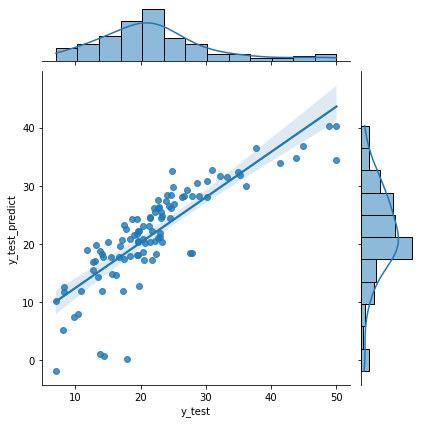

In [15]:
### Compare observations in the test data and forecast of the model.

### Create a dataframe

test = pd.DataFrame()
test['y_test'] = y_test
test['y_test_predict'] = y_test_predict

### View the result as jointplot of the seaborn library.

sns.jointplot(data=test, x = 'y_test', y = 'y_test_predict', kind = 'reg')

Source and origin of inspiration:<br /> 
Aki Taanila: Data-analytiikka Pythonilla: <a href="https://tilastoapu.wordpress.com/python/">https://tilastoapu.wordpress.com/python/</a>